<a href="https://colab.research.google.com/github/MahmoodBabalola/payment-Fraud-Detection/blob/main/Online_Payment_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [2]:
#read in the data
data = pd.read_csv("/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv") 

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape #check the shape of the data

(6362620, 11)

In [ ]:
#check the column and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
#check for missing value
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#check if there are duplicated columns in the data
data.duplicated().value_counts()

False    6362620
dtype: int64

In [ ]:
#check out the summary statistics of the data
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


EDA

Categorical variables

In [5]:
# Check the distribution of the values in the column
cols = ['type', 'isFraud', 'isFlaggedFraud']
for column in cols:
  print(f"Value counts for {column}:")
  print(data[column].value_counts(), end="\n\n")


Value counts for type:
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Value counts for isFraud:
0    6354407
1       8213
Name: isFraud, dtype: int64

Value counts for isFlaggedFraud:
0    6362604
1         16
Name: isFlaggedFraud, dtype: int64



In [6]:
#How many fraud are classified as fraud
ct = pd.crosstab(data['isFraud'], data['isFlaggedFraud'])
print(ct)


isFlaggedFraud        0   1
isFraud                    
0               6354407   0
1                  8197  16


In [16]:
#Less than 1% of the fradulent transaction is classified as fraud
(16/8213)

0.0019481310118105442

In [ ]:
#visualize the type of transaction in the data
type_counts = data["type"].value_counts()
transactions = type_counts.index
quantity = type_counts.values

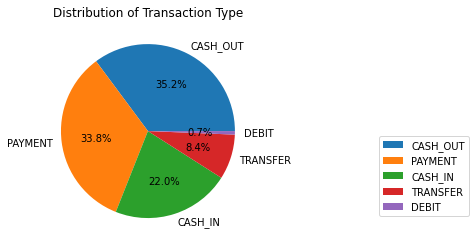

In [ ]:
plt.pie(quantity, labels=transactions, autopct='%1.1f%%')
plt.title("Distribution of Transaction Type")
plt.legend(transactions,loc='best',bbox_to_anchor=(2,0.5))
plt.show()

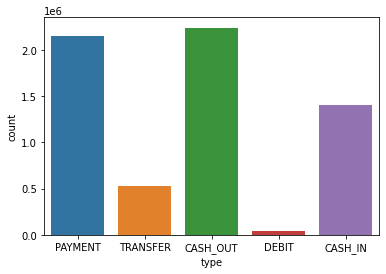

In [ ]:
sns.countplot(x='type', data=data)

In [ ]:
#visualize the output variable
isFraud_counts = data["isFraud"].value_counts()
label = isFraud_counts.index
values = isFraud_counts.values

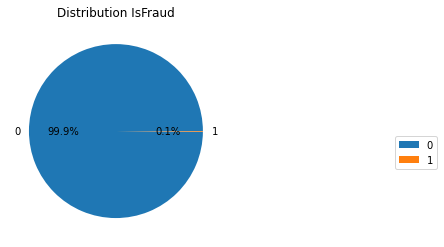

In [ ]:
plt.pie(values, labels=label, autopct='%1.1f%%')
plt.title("Distribution IsFraud")
plt.legend(label,loc='best',bbox_to_anchor=(2,0.5))
plt.show()

Numerical variables

Histogram for step:


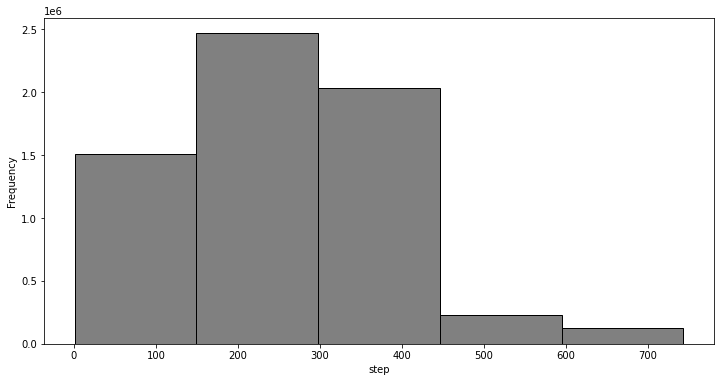

Histogram for amount:


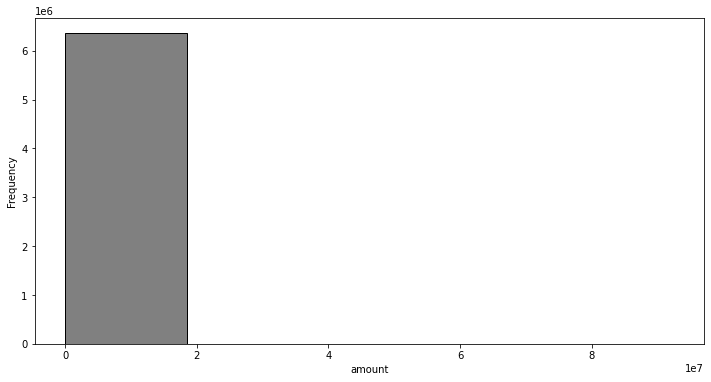

Histogram for oldbalanceOrg:


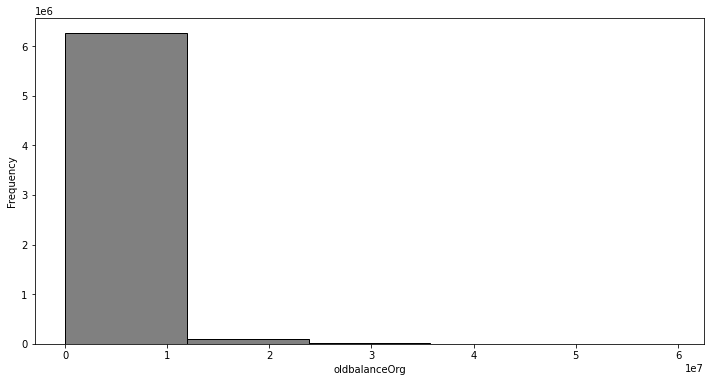

Histogram for newbalanceOrig:


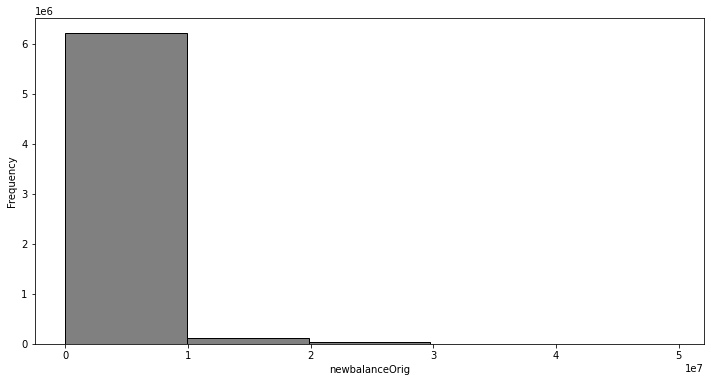

Histogram for oldbalanceDest:


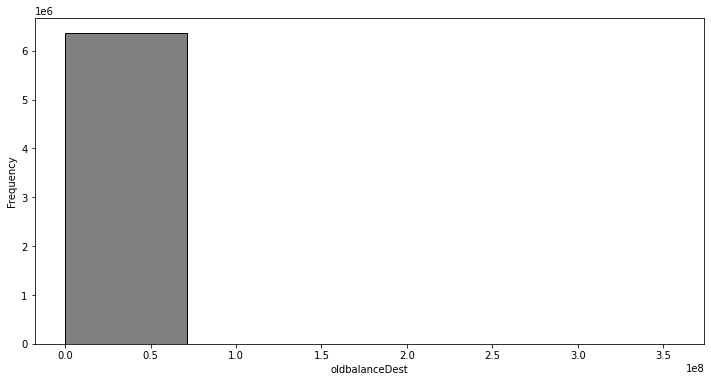

Histogram for newbalanceDest:


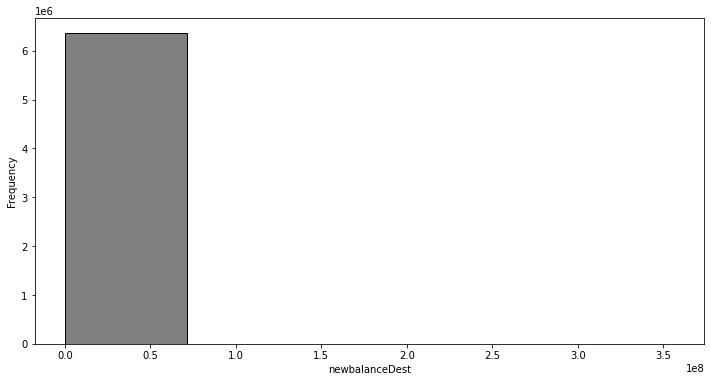

In [6]:
# Eplore the numerical variables
cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for column in cols:
  plt.xlabel(column)
  print(f"Histogram for {column}:")
  data[column].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey', edgecolor='black')
  plt.show()

In [10]:
#Calculate the skweness of each column
cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
skewness = data[cols].skew()
skewness

step               0.375177
amount            30.993949
oldbalanceOrg      5.249136
newbalanceOrig     5.176884
oldbalanceDest    19.921758
newbalanceDest    19.352302
dtype: float64

In [11]:
#use Quantile based flooring(10th percentile) and capping (90th percentile)

# Calculate the 10th and 90th percentile values for each feature
percentiles = data[cols].quantile([0.1, 0.9])

In [12]:
# Replace the outlier values with the 10th and 90th percentile values
data[cols] = data[cols].apply(lambda x: x.clip(lower=percentiles.loc[0.1, x.name], upper=percentiles.loc[0.9, x.name]))

In [13]:
skewness = data[cols].skew()
skewness

step             -0.291329
amount            0.804646
oldbalanceOrg     2.249361
newbalanceOrig    2.226285
oldbalanceDest    1.417312
newbalanceDest    1.359302
dtype: float64

Histogram for step:


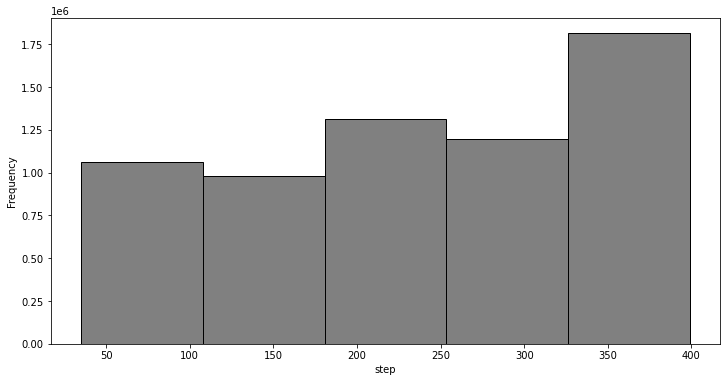

Histogram for amount:


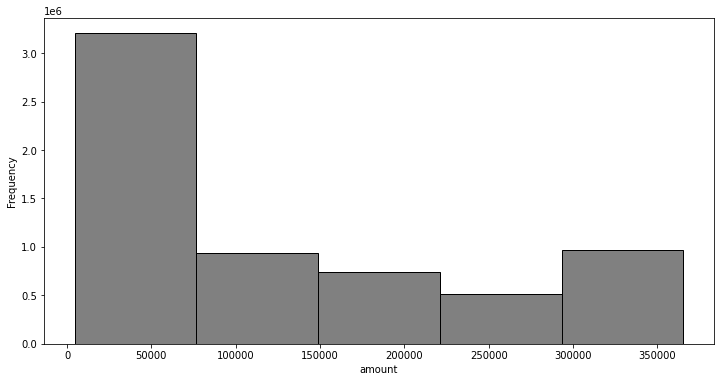

Histogram for oldbalanceOrg:


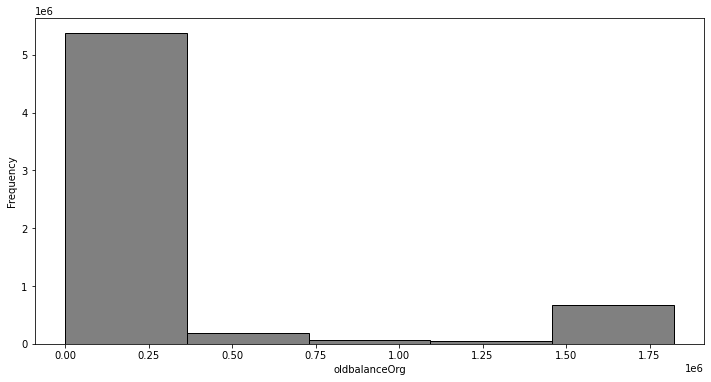

Histogram for newbalanceOrig:


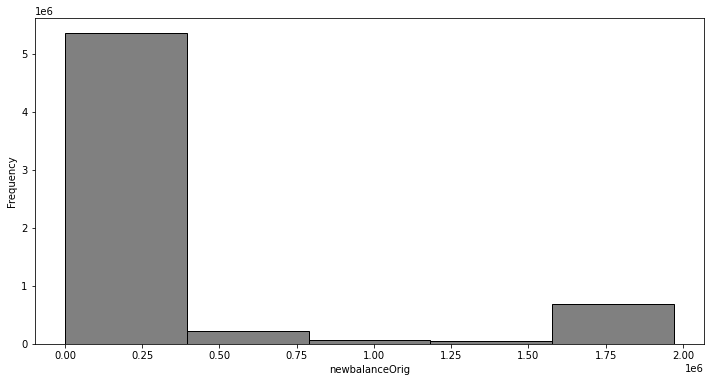

Histogram for oldbalanceDest:


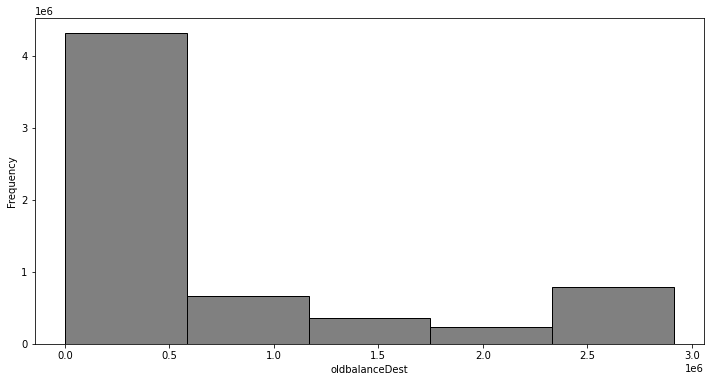

Histogram for newbalanceDest:


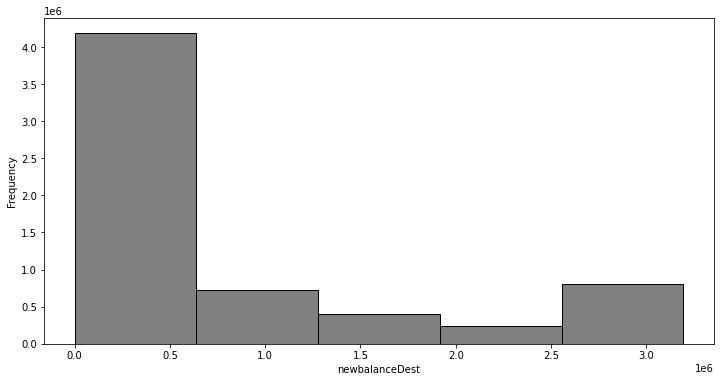

In [11]:
#most of the extreme rows ahs been taken care of
for column in cols:
  plt.xlabel(column)
  print(f"Histogram for {column}:")
  data[column].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey', edgecolor='black')
  plt.show()

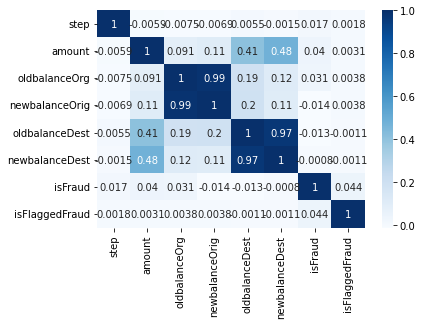

In [ ]:
#correlation between the features
corr = data.corr()
sns.heatmap(corr,annot=True, cmap="Blues")

In [14]:
#convert a categorical variable into a numeric variable
# Use one hot encoding because there is no ranking between values
data = pd.get_dummies(data, columns=['type',])

In [13]:
data.head

<bound method NDFrame.head of           step      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0         35.0    9839.640  C1231006815     170136.000       160296.36   
1         35.0    4501.300  C1666544295      21249.000        19384.72   
2         35.0    4501.300  C1305486145        181.000            0.00   
3         35.0    4501.300   C840083671        181.000            0.00   
4         35.0   11668.140  C2048537720      41554.000        29885.86   
...        ...         ...          ...            ...             ...   
6362615  399.0  339682.130   C786484425     339682.130            0.00   
6362616  399.0  365423.309  C1529008245    1822508.289            0.00   
6362617  399.0  365423.309  C1162922333    1822508.289            0.00   
6362618  399.0  365423.309  C1685995037     850002.520            0.00   
6362619  399.0  365423.309  C1280323807     850002.520            0.00   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \


rename the output variable as fraud and no fraud

Modelling

In [15]:
x = np.array(data[["type_CASH_IN", "type_CASH_OUT", "type_DEBIT", "type_PAYMENT", "type_TRANSFER", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

Modells to be fitted includes

Logistic regression

Random Forest classifier

Decision tree classifier

In [15]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
np. unique(y_train, return_counts=True) #Count the occurrences of Each Unique Value for the training set

(array([0, 1]), array([5083524,    6572]))

In [22]:
np. unique(y_test, return_counts=True) #Count the occurrences of Each Unique Value for the test set

(array([0, 1]), array([1270883,    1641]))

Logistic regression

In [21]:
# logistic regression using L2 regularization (Ridge Regression)
# there is a high correlation between NewBalanceOrig and OldBalanceOrig, OldBalanceDest and NewBalanceDest
# It is best to use a regularization that takes care of multicolinearity in the data since all the variables are important
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [23]:
logreg = LogisticRegression(random_state=0)

# fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1270732,     151],
       [   1063,     578]])

In [25]:
target_names = ["No Fraud", "Fraud"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00   1270883
       Fraud       0.79      0.35      0.49      1641

    accuracy                           1.00   1272524
   macro avg       0.90      0.68      0.74   1272524
weighted avg       1.00      1.00      1.00   1272524



Recall value of 35% is too small consedering what we need to predict is the Fraud

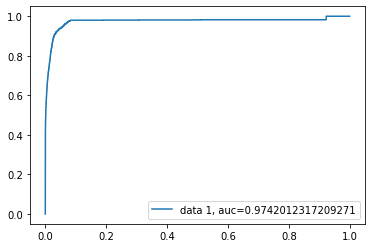

In [ ]:
y_pred_prob = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
clf = DT.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [30]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1270505,     378],
       [    417,    1224]])

In [31]:
target_names = ["No Fraud", "Fraud"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00   1270883
       Fraud       0.76      0.75      0.75      1641

    accuracy                           1.00   1272524
   macro avg       0.88      0.87      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



A recall of 0.75 means 75% of the time, the model is able to identify if the transaction is fraud and a precision of 1 when it is not fraud, this result is acceptable

Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
clf = RF.fit(x_train,y_train)
y_pred = clf.predict(x_test)

<ipython-input-32-7e8f4e8187a1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RF.fit(x_train,y_train)


In [33]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1270540,     343],
       [    423,    1218]])

In [34]:
target_names = ["No Fraud", "Fraud"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00   1270883
       Fraud       0.78      0.74      0.76      1641

    accuracy                           1.00   1272524
   macro avg       0.89      0.87      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



In [39]:
#features = [type_CASH_IN, type_CASH_OUT, type_DEBIT, type_PAYMENT, type_TRANSFER, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[1, 0, 0, 0, 0, 9000.60, 9000.60, 0.0]])
print(clf.predict(features))

[0]
